In [156]:
'''machine learning model to predict the aggregate rating of a restaurant based on other features'''
#Libraries Import section
import numpy as np
import pandas as pd
import sklearn
from google.colab import files
import io
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer

In [154]:
#Load the dataset
uploaded=files.upload()


Saving Dataset .csv to Dataset  (2).csv


In [157]:
df=pd.read_csv(io.BytesIO(uploaded['Dataset  (2).csv']))

In [158]:
#Basic EDA
#Dataset head
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [159]:
#Understand features data types
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [160]:
#Numerical features exploration
df.describe()



,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [155]:
class RatingPred:
 #Constructor
 def __init__(self,df):
   self.df=df
#Visualize the characteristics of prominent features
 def dataviz_char(self):
  sns.set()
  fig, axes = plt.subplots(1, 2, figsize=(16,8))
  axes[0].set_title("Votes vs Rating Text")
  sns.barplot(ax=axes[0],x=df["Rating text"],y=df["Votes"],hue =df["Rating color"])
  axes[1].set_title("Aggregate rating vs Votes")
  sns.scatterplot(ax=axes[1],x=df["Aggregate rating"],y=df["Votes"],hue=df["Price range"])
 #Understand correlations between features
 def dataviz_corr(self) :
    sns.pairplot(df[['Average Cost for two','Aggregate rating','Rating text','Price range']],hue='Rating text')
 #Preprocessing pipeline method
 def prep_train(self):
     df_prep=self.df
   #Remove unused columns
     self.df_prep=df_prep
     df_prep= df_prep.drop('Restaurant ID', axis=1)
     df_prep= df_prep.drop('Restaurant Name', axis=1)
     df_prep= df_prep.drop('Country Code', axis=1)
     df_prep= df_prep.drop('City', axis=1)
     df_prep= df_prep.drop('Address', axis=1)
     df_prep= df_prep.drop('Locality', axis=1)
     df_prep= df_prep.drop('Locality Verbose', axis=1)
     df_prep= df_prep.drop('Longitude', axis=1)
     df_prep= df_prep.drop('Latitude', axis=1)
     df_prep= df_prep.drop('Cuisines', axis=1)
     df_prep= df_prep.drop('Currency', axis=1)
     df_prep= df_prep.drop('Rating color', axis=1)
     cat_vars=list(df_prep.select_dtypes(exclude=['number']).columns)
     num_vars=list(df_prep.select_dtypes(include=['number']).columns)
     preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_ip', OrdinalEncoder(), cat_vars),
        ('numerical_ip', StandardScaler(), num_vars)
          ]
            )
     preprocessor.set_output(transform='pandas')
     pipe = Pipeline(steps=[
      ('preprocessor', preprocessor)
            ])
     pipe.fit(df_prep)
     df_prep=pipe.transform(df_prep)
     return  df_prep

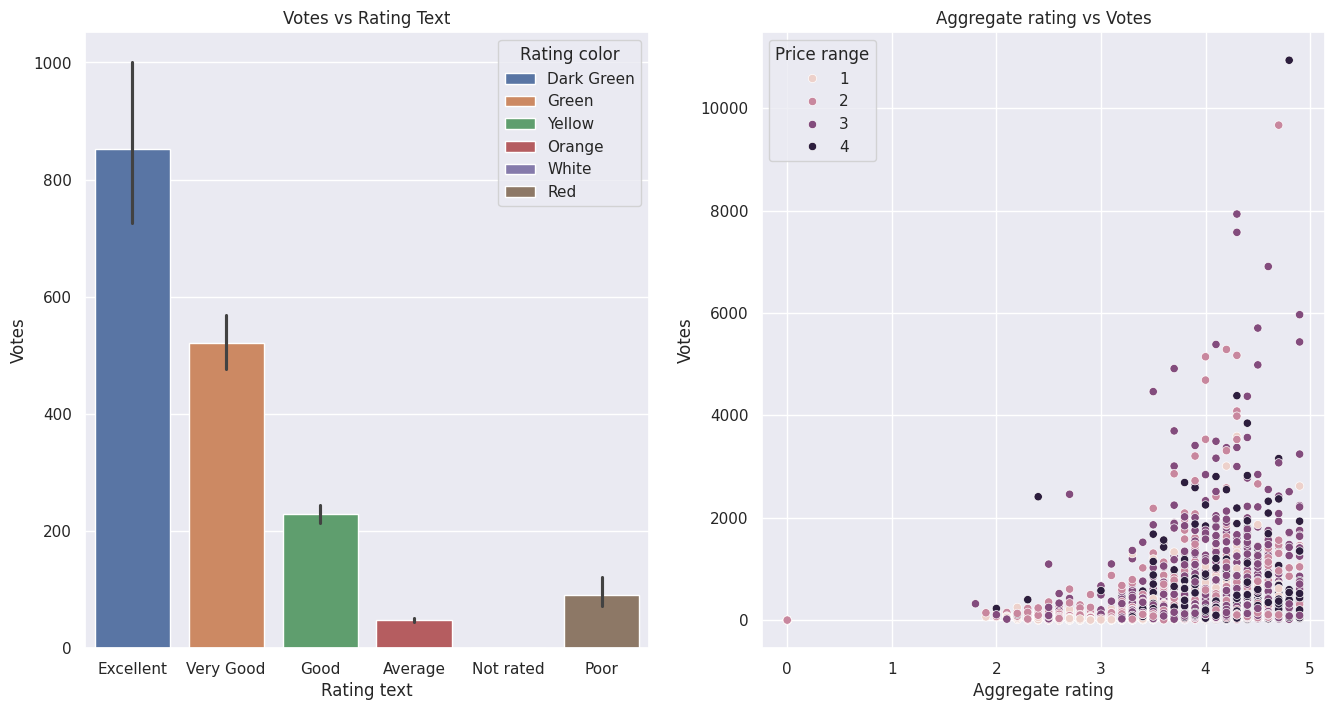

In [161]:
#Test_block
test=RatingPred(df)
test.dataviz_char()#Prominent features characteristics


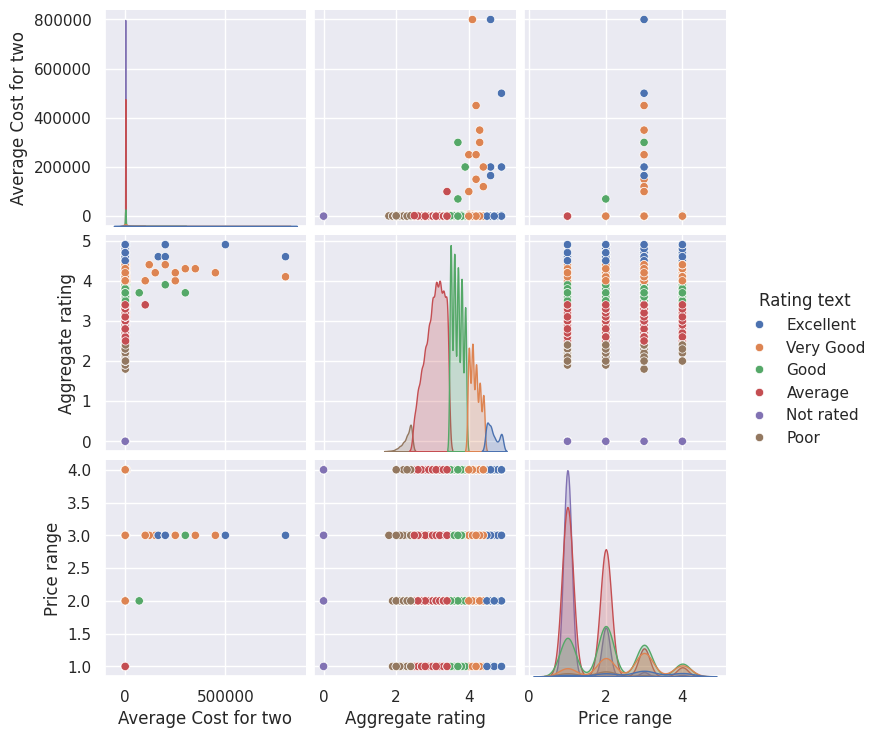

In [162]:
test.dataviz_corr()# features correlations

In [163]:
#Training class
class model_train(RatingPred):
  def __init__(self):
    super().__init__(df)
    self.df_tr=super().prep_train()
  def corr_plot(self):
     #Correlation matrix
     correlation_matrix = super().prep_train().corr()
     plt.figure(figsize=(10, 8))
     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
     plt.title('Correlation Heatmap')
  def model(self):
     #Split
     x = super().prep_train().drop('numerical_ip__Aggregate rating', axis=1)
     y =super().prep_train()['numerical_ip__Aggregate rating']
     x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=1)
     #Grid search cv
     #Learning algorithms initialization(Softmax Regression and XGB Classifier)
     lr=SGDRegressor()
     dt=DecisionTreeRegressor()
     models={
     'SGDRegressor':{
       'model_name':lr,
       'params':{
      'max_iter':[100,500,1000],
      'alpha':[0.0001,0.001,0.01]
         },
       },
      'Decision Tree Regressor':{
        'model_name':dt,
        'params':{
           "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
         },
     },
      }
     score=[]
     scoring_metrics = {'Mean square error': 'neg_mean_squared_error', 'R2_Score': 'r2'}
     for model_name,mp in models.items():
       model=GridSearchCV(mp['model_name'],mp['params'],cv=3,return_train_score=False,scoring='r2')
       model.fit(x_train,y_train)
       score.append({
      'model':model_name,
      'best_params':model.best_params_,
      #'Mean Squared Error':mean_squared_error(y_val,model.predict(x_val)),
      'R2_Score-train':r2_score(y_train,model.predict(x_train)),
      'R2_Score-test':r2_score(y_test,model.predict(x_test)),
      })
     df_score=pd.DataFrame(score,columns=['model','best_params','R2_Score-train','R2_Score-test'])
     print(df_score)


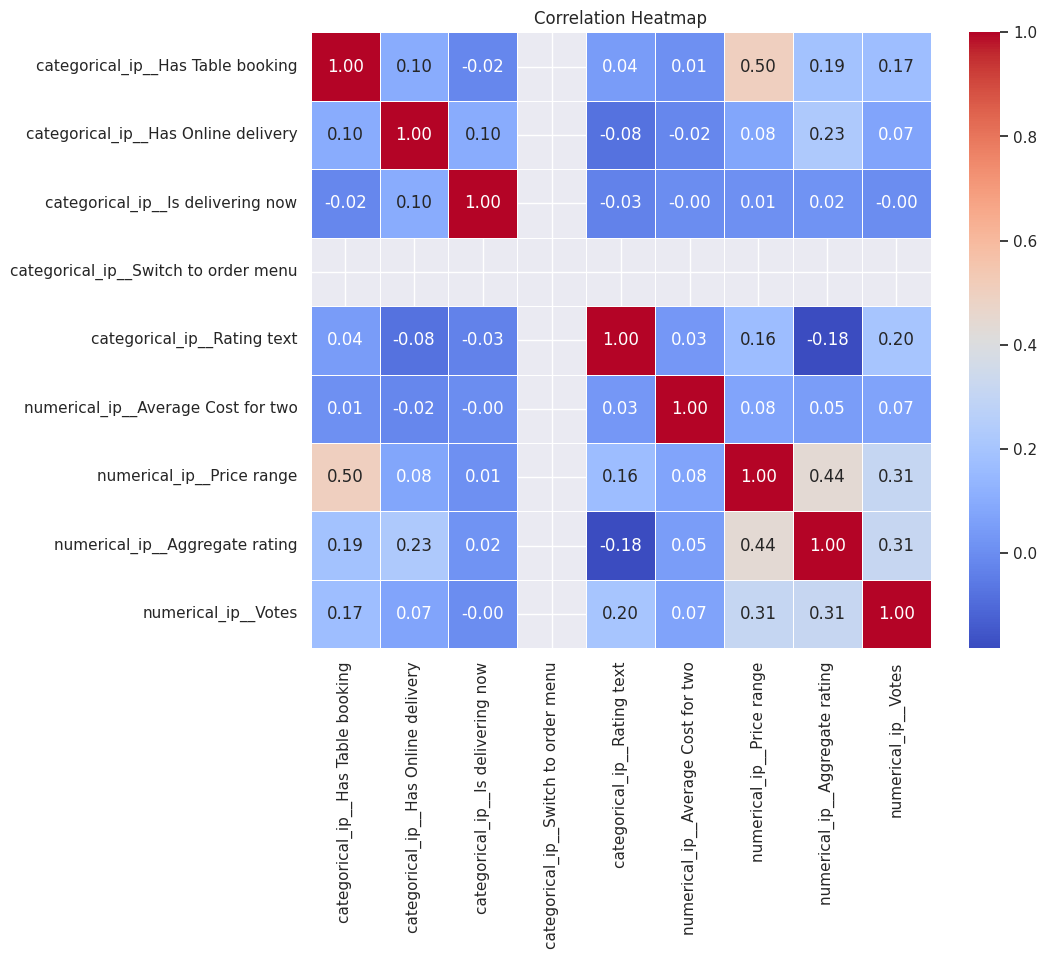

In [166]:
#Test Block
 #Feature correlation
train=model_train()
train.corr_plot()



In [167]:
train.model()

                     model                               best_params  \
0             SGDRegressor         {'alpha': 0.01, 'max_iter': 1000}   
1  Decision Tree Regressor  {'max_depth': 5, 'min_samples_leaf': 10}   

   R2_Score-train  R2_Score-test  
0        0.334087       0.336414  
1        0.987156       0.986620  


In [168]:
""" CONCLUSION:
-We observe that the Decision Tree Regressor performs better than the SGD Regressor, the r2 score of dt is 0.98 which is very high
-Also we observe that the r2 obtained on the test set is very close to the one obtained on the train set,hence we conclude that the model is
generalizing well on new data and does not overfit

"""

' CONCLUSION:\n-We observe that the Decision Tree Regressor performs better than the SGD Regressor, the r2 score of dt is 0.98 which is very high\n-Also we observe that the r2 obtained on the test set is very close to the one obtained on the train set,hence we conclude that the model is\ngeneralizing well on new data and does not overfit \n\n'